<a href="https://colab.research.google.com/github/JNAbhishek27/ReplyAI/blob/main/unstop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving emails.csv to emails.csv


In [3]:
!pip install pandas

In [4]:
import pandas as pd

# ==============================
# Load CSV
# ==============================
emails = pd.read_csv("emails.csv")

# ==============================
# Priority Detection
# ==============================
urgent_keywords = ["urgent", "immediate", "critical", "downtime", "blocked", "error"]

def detect_priority(subject, body):
    text = f"{subject} {body}".lower()
    return "Urgent" if any(word in text for word in urgent_keywords) else "Not urgent"

emails["priority"] = emails.apply(lambda x: detect_priority(x["subject"], x["body"]), axis=1)

# ==============================
# Sentiment Detection (simple heuristic)
# ==============================
negative_words = ["unable", "error", "problem", "issue", "down", "blocked", "doesn’t work"]

def detect_sentiment(body):
    body = body.lower()
    return "Negative" if any(word in body for word in negative_words) else "Neutral"

emails["sentiment"] = emails["body"].apply(detect_sentiment)

# ==============================
# Context Tagging
# ==============================
context_map = {
    "login": ["log in", "login", "reset password", "verification"],
    "billing": ["billing", "charged", "pricing", "refund"],
    "api_integration": ["api", "integration", "crm"],
    "downtime": ["down", "server", "inaccessible", "system"],
}

def detect_context(body):
    body = body.lower()
    for tag, keywords in context_map.items():
        if any(word in body for word in keywords):
            return tag
    return "general"

emails["context"] = emails["body"].apply(detect_context)

# ==============================
# Draft Reply Generation
# ==============================
reply_templates = {
    "login": "We’re sorry you’re facing login issues. Please try resetting your password. If the issue persists, we’ll escalate it to our technical team.",
    "billing": "We regret the billing inconvenience. Our finance team is reviewing your case and will update you shortly.",
    "api_integration": "Thank you for your interest in API integration. We support CRM and third-party integrations. Could you specify which system you’d like to connect?",
    "downtime": "We understand the impact of downtime. Our engineers are working on restoring services. We’ll keep you updated with progress.",
    "general": "Thank you for reaching out. Our support team will review your request and respond soon.",
}

emails["draft_reply"] = emails["context"].apply(lambda x: reply_templates.get(x, reply_templates["general"]))

# ==============================
# Save structured output
# ==============================
emails.to_csv("processed_emails.csv", index=False)
emails.head(10)


,sender,subject,body,sent_date,priority,sentiment,context,draft_reply
0,eve@startup.io,Help required with account verification,Do you support integration with third-party AP...,2025-08-19 00:58:09,Not urgent,Neutral,api_integration,Thank you for your interest in API integration...
1,diana@client.co,General query about subscription,"Hi team, I am unable to log into my account si...",2025-08-25 00:58:09,Not urgent,Negative,login,We’re sorry you’re facing login issues. Please...
2,eve@startup.io,Immediate support needed for billing error,"Hello, I wanted to understand the pricing tier...",2025-08-20 12:58:09,Urgent,Negative,billing,We regret the billing inconvenience. Our finan...
3,alice@example.com,Urgent request: system access blocked,"Hi team, I am unable to log into my account si...",2025-08-21 21:58:09,Urgent,Negative,login,We’re sorry you’re facing login issues. Please...
4,eve@startup.io,Question: integration with API,"Despite multiple attempts, I cannot reset my p...",2025-08-20 04:58:09,Not urgent,Neutral,general,Thank you for reaching out. Our support team w...
5,alice@example.com,Critical help needed for downtime,"Hi team, I am unable to log into my account si...",2025-08-18 08:58:09,Urgent,Negative,login,We’re sorry you’re facing login issues. Please...
6,diana@client.co,Help required with account verification,There is a billing error where I was charged t...,2025-08-20 19:58:09,Urgent,Negative,billing,We regret the billing inconvenience. Our finan...
7,diana@client.co,Support needed for login issue,I am facing issues with verifying my account. ...,2025-08-23 06:58:09,Not urgent,Negative,login,We’re sorry you’re facing login issues. Please...
8,alice@example.com,General query about subscription,"Our servers are down, and we need immediate su...",2025-08-26 02:58:09,Urgent,Negative,downtime,We understand the impact of downtime. Our engi...
9,alice@example.com,Help required with account verification,Do you support integration with third-party AP...,2025-08-21 13:58:09,Not urgent,Neutral,api_integration,Thank you for your interest in API integration...


In [5]:
from google.colab import files
files.download("processed_emails.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sample labeled data:
                                      subject category
0     Help required with account verification    Login
1            General query about subscription  General
2  Immediate support needed for billing error   Urgent
3       Urgent request: system access blocked   Urgent
4              Question: integration with API    Login

Classification Report:
              precision    recall  f1-score   support

     Billing       0.00      0.00      0.00         1
     General       0.00      0.00      0.00         1
       Login       1.00      1.00      1.00         1
      Urgent       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.33      0.50      0.38         4
weighted avg       0.33      0.50      0.38         4



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


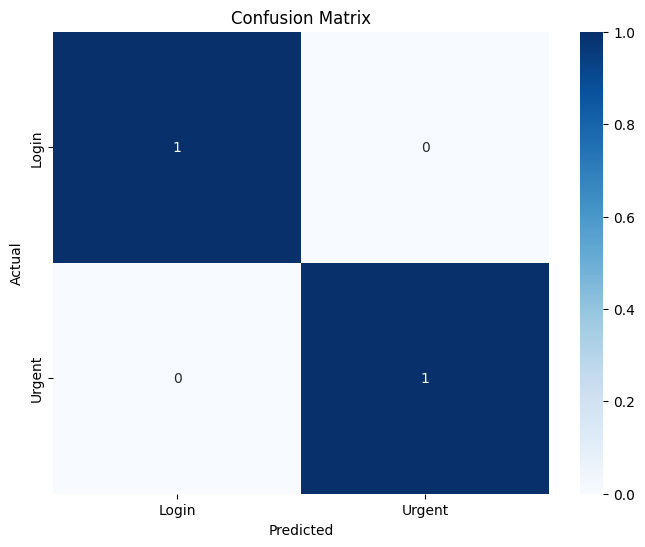

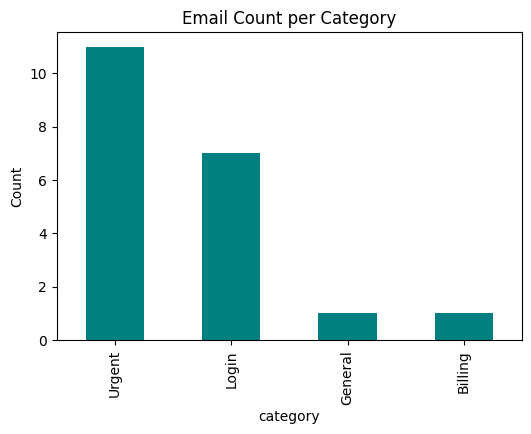

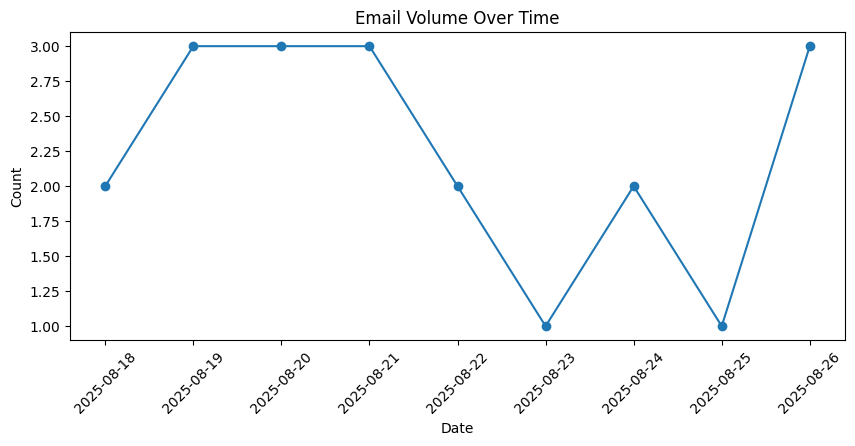

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------
# Step 1: Load Data
# -----------------------
df = pd.read_csv("/content/emails.csv")

# -----------------------
# Step 2: Simple labeling (rule-based)
# -----------------------
def label_email(text):
    text = text.lower()
    if "urgent" in text or "critical" in text or "immediate" in text or "downtime" in text:
        return "Urgent"
    elif "billing" in text or "pricing" in text or "refund" in text or "charged" in text:
        return "Billing"
    elif "login" in text or "password" in text or "verification" in text or "access" in text:
        return "Login"
    elif "integration" in text or "api" in text or "crm" in text:
        return "Integration"
    elif "server" in text or "down" in text or "system" in text:
        return "Downtime"
    else:
        return "General"

df["category"] = df["subject"] + " " + df["body"]
df["category"] = df["category"].apply(label_email)

print("Sample labeled data:")
print(df[["subject", "category"]].head())

# -----------------------
# Step 3: Train/Test Split
# -----------------------
X = df["subject"] + " " + df["body"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------
# Step 4: Vectorize text
# -----------------------
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# -----------------------
# Step 5: Train classifier
# -----------------------
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

# -----------------------
# Step 6: Evaluation
# -----------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# -----------------------
# Step 7: Visual Insights
# -----------------------
# Count per category
plt.figure(figsize=(6,4))
df["category"].value_counts().plot(kind="bar", color="teal")
plt.title("Email Count per Category")
plt.ylabel("Count")
plt.show()

# Timeline of emails
df["sent_date"] = pd.to_datetime(df["sent_date"])
plt.figure(figsize=(10,4))
df.groupby(df["sent_date"].dt.date)["category"].count().plot(marker="o")
plt.title("Email Volume Over Time")
plt.ylabel("Count")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()


In [16]:
code = """
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("emails.csv")

# Categorize (if not already labeled)
def label_email(subject, body):
    text = (str(subject) + " " + str(body)).lower()
    if "billing" in text or "pricing" in text or "refund" in text:
        return "Billing Issue"
    elif "login" in text or "password" in text or "access" in text or "verification" in text:
        return "Login/Access Issue"
    elif "down" in text or "critical" in text or "urgent" in text:
        return "Downtime Issue"
    elif "integration" in text or "api" in text or "crm" in text:
        return "Integration Query"
    else:
        return "General Query"

if "Category" not in df.columns:
    df["Category"] = df.apply(lambda x: label_email(x["subject"], x["body"]), axis=1)

# Streamlit UI
st.title("📧 AI-Powered Email Assistant")
st.write("Prototype dashboard to manage support emails")

st.subheader("All Emails")
st.dataframe(df[["sender","subject","sent_date","Category"]])

# Analytics
st.subheader("Analytics")
category_counts = df["Category"].value_counts()

fig, ax = plt.subplots()
sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
plt.xticks(rotation=45)
st.pyplot(fig)

# Sample AI Response (demo only)
st.subheader("AI Draft Response")
sample = df.iloc[0]
st.write(f"**Incoming Mail**: {sample['subject']}")
st.write(f"**AI Draft Reply**: Hello {sample['sender'].split('@')[0]}, thanks for reaching out regarding *{sample['Category']}*. Our support team is already working on it and will get back to you shortly.")
"""

with open("app.py", "w") as f:
    f.write(code)


In [ ]:
!pip install streamlit pyngrok
from pyngrok import ngrok

# Start streamlit
!streamlit run app.py &

# Expose on public URL
public_url = ngrok.connect(8501)
print("🌍 Streamlit Live URL:", public_url)





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.59.122:8501

